## Table of contents
#### Step 1 and 2: Installing scikit-learn library and importing libraries and data
#### Step 3: Data cleaning
#### Step 4: Exploring the data visually (e.g., by way of a scatterplot), looking for variables whose relationship I'd like to test
#### Step 5: Stating the hypothesis
#### Step 6: Reshaping the variables into NumPy arrays 
#### Step 7: Splitting the data into a training set and a test set
#### Step 8: Running a linear regression on the data
#### Step 9: Creating a plot that shows the regression line on the test set
#### Step 10: Interpretation of how well the line appears to fit the data 
#### Step 11: Checking the model performance statistics (MSE and R² score)
#### Step 12: Comparing the predicted y values with the actual y values in a dataframe
#### Step 13: Thoughts on how well the model performed on the test set

## Step 1 and 2: Installing scikit-learn library and importing libraries and data

In [1]:
# Importing libraries and functions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing data file by creating a path

path = r'C:\Users\Lenovo\Documents\Eva\Achievement 6'
df = pd.read_csv(os.path.join(path,'Project Achievement 6 Tornado_clean_statename.csv'), index_col = False)

In [4]:
# Checking the dataframe

df.head()

,Unnamed: 0,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [5]:
# Deleting the first two unnecessary columns

df = df.drop(columns = ['Unnamed: 0'])  

In [6]:
# Checking the dataframe again

df.head()

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [14]:
df.shape

(67096, 15)

## Step 3: Data cleaning

The data has already been cleaned in a previous task.

In [11]:
# Checking for missing values

df.isnull().sum()

Year                      0
Month                     0
Day                       0
Date                      0
State                     0
Magnitude               605
Injuries                  0
Fatalities                0
Starting latitude         0
Starting longitude        0
Ending latitude       26023
Ending longitude      26023
Length of track           0
Width                     0
State name                0
dtype: int64

In [12]:
# Checking for duplicate records

df_dups = df[df.duplicated()]

In [13]:
df_dups

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name


There are only the already known missing values in "Magnitude", "Ending latitude" and "Ending longitude", and there are no duplicate records.

## Step 4: Exploring the data visually (e.g., by way of a scatterplot), looking for variables whose relationship I'd like to test

Text(0.5, 1.0, 'Relationship between injuries and fatalities caused by tornados')

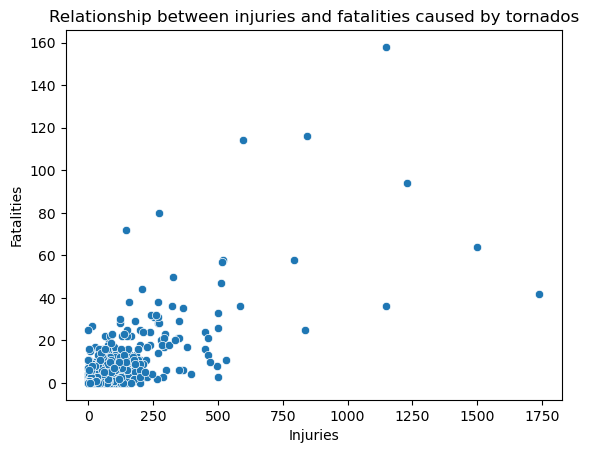

In [29]:
# Creating a scatterplot in seaborn for "Fatalities" and "Injuries"

sns.scatterplot(x = 'Injuries', y = 'Fatalities', data = df)
plt.title('Relationship between injuries and fatalities caused by tornados')  

## Step 5: Stating the hypothesis

The higher the number of injuries caused by a tornado is, the higher the number of fatalities.

## Step 6: Reshaping the variables into NumPy arrays 

In [20]:
X = df['Injuries'].values.reshape(-1,1)
y = df['Fatalities'].values.reshape(-1,1)

In [21]:
X

array([[3],
       [3],
       [1],
       ...,
       [0],
       [0],
       [6]], dtype=int64)

In [22]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## Step 7: Splitting the data into a training set and a test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Step 8: Running a linear regression on the data

In [24]:
# Creating a regression object

regression = LinearRegression() 

In [25]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predicting y on the training set

y_predicted_train = regression.predict(X_train)

In [34]:
# Predicting y on the test set

y_predicted = regression.predict(X_test)

## Step 9: Creating a plot that shows the regression line on the test set

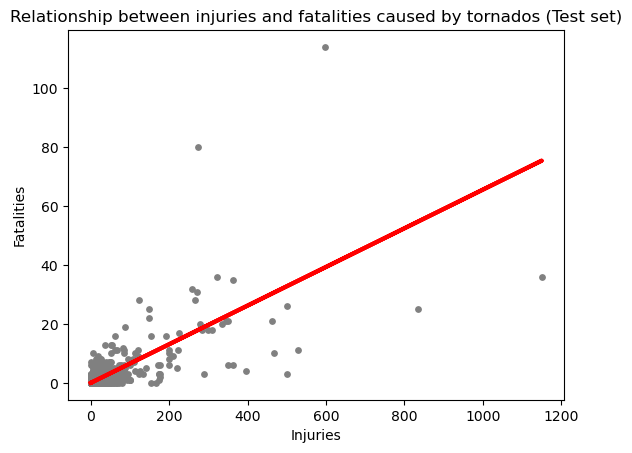

In [35]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between injuries and fatalities caused by tornados (Test set)')
plot_test.xlabel('Injuries')
plot_test.ylabel('Fatalities')
plot_test.show()

## Step 10: Interpretation of how well the line appears to fit the data 

We see that most injuries and fatalities caused by a tornado are relatively small in number, clustering between 0 and 250 (injuries) as well as 0 and 20 (fatalities). These obersevations are relatively close to the line, even when injuries and fatalities increase a little more in number (to 500 and 40 respectively). However, above these values, the variance of injuries and fatalities is pretty high, with the single dots/observations being far away from the graph line. So, in this area the line doesn't appear to fit the data very well. Generally, we can state that the higher the injuries, the higher the fatalities, but this is no perfect relationship and there are some exceptions to this, especially when the numbers of injuries and fatalities increase. 

## Step 11: Checking the model performance statistics (MSE and R² score)

In [36]:
# Creating objects that contain the model summary statistics

mse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [37]:
# Printing the model summary statistics

print('Slope:' , regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[0.06555973]]
Mean squared error:  1.0511644628911454
R2 score:  0.45988879259554205


## Step 12: Comparing the predicted y values with the actual y values in a dataframe

In [38]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.130203
1,0,-0.000917
2,0,-0.000917
3,0,-0.000917
4,0,-0.000917
5,0,-0.000917
6,0,-0.000917
7,0,0.326882
8,0,-0.000917
9,0,-0.000917


In [39]:
# Comparing how the regression fits the training set

mse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[0.06555973]]
Mean squared error:  0.8855676056626867
R2 score:  0.6205736100958701


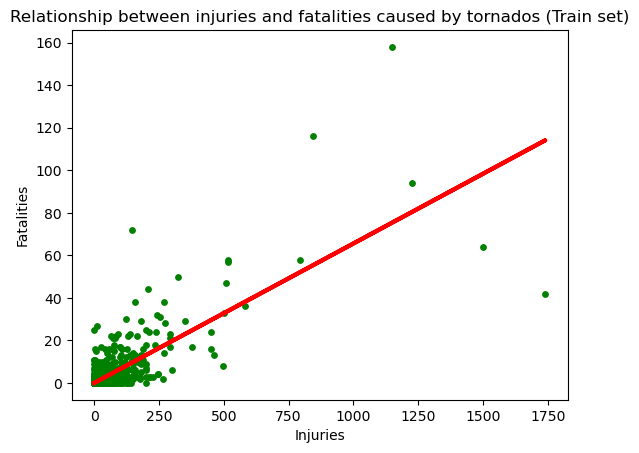

In [41]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Relationship between injuries and fatalities caused by tornados (Train set)')
plot_test.xlabel('Injuries')
plot_test.ylabel('Fatalities')
plot_test.show()

## Step 13: Thoughts on how well the model performed on the test set

The model didn't perform that well on the test set since the number of injuries predicted only 45.99% of the variance of the number of fatalities. One explanation could be that the relationship between the two variables is not purely linear. Also, one needs to consider that reality seems to be more complex than just a (linear) relationship between two variables. One could imagine a scenario where the number of injured people is high and there are no people killed because a tornado of relatively low magnitude hit an area where many people live. The other way round, one could image that a tornado of relatively high magnitude can kill many people, leaving not many people to be injured. Therefore, the hypothesis “the higher the number of injuries, the higher the number of fatalities” is only partially true. There is still a lot of variance in the data that can’t be explained by the linear relationship between the variables.
Another thing to be noticed is that the model performed significantly better on the training set than on the test set, with 62.06% explained variance compared to said 45.99% explained variance. That means that I've overfitted the model; the model is so specific that in the end it can only fit itself to the training data and not any other data (making it a bit useless when it comes to predicting things). 

## Bonus: Regression with "Magnitude" as independent variable

Hypothesis: The higher the magnitude of a tornado, the higher the number of injuries caused by this tornado.

In [44]:
# Dropping the missing values in the column "Magnitude"

df.dropna(subset = ['Magnitude'], inplace = True) 

In [45]:
# Checking the output

df.shape

(66491, 15)

605 rows have been dropped.

In [33]:
# Reshaping the variables into NumPy arrays

X = df['Magnitude'].values.reshape(-1,1)
y = df['Injuries'].values.reshape(-1,1)

In [34]:
X

array([[3.],
       [3.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [35]:
y

array([[3],
       [3],
       [1],
       ...,
       [0],
       [0],
       [6]], dtype=int64)

In [36]:
# Splitting the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Creating a regression object

regression = LinearRegression() 

In [38]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predicting y on the training set

y_predicted_train = regression.predict(X_train)

In [40]:
# Predicting y on the test set

y_predicted = regression.predict(X_test)

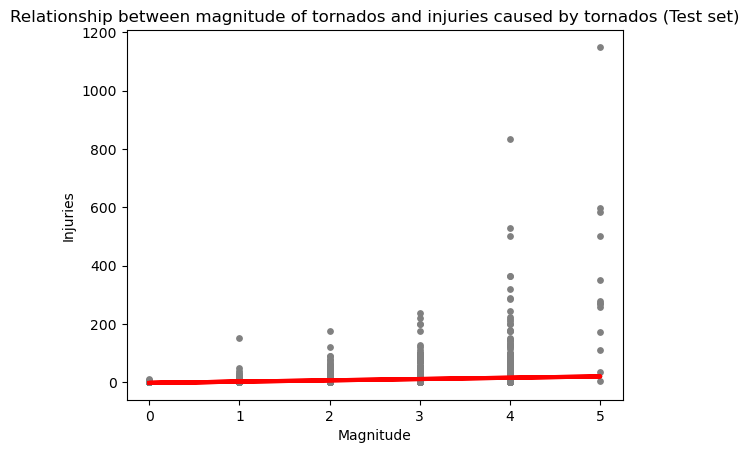

In [41]:
# Creating a plot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between magnitude of tornados and injuries caused by tornados (Test set)')
plot_test.xlabel('Magnitude')
plot_test.ylabel('Injuries')
plot_test.show()

In [42]:
# Creating objects that contain the model summary statistics

mse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [43]:
# Printing the model summary statistics

print('Slope:' , regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[4.45058668]]
Mean squared error:  279.9820498376348
R2 score:  0.06122955714689404


The hypothesis ("The higher the magnitude of a tornado, the higher the number of injuries caused by this tornado") needs to be rejected, since there is no recognizable relationship between magnitude and injuries, and the explained variance is very small (6.12%). 